In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [2]:
import glob
from ercollect import molecule as mol
from ercollect.molecule import molecule
from ercollect import rxn_syst
from ercollect.rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [3]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

### collect a random subset of X reactions

In [71]:
no_ = 300
rs_to_test = []
no_rxns_in_total = len(glob.glob(directory+"*sRS*.gpkl"))
idx = np.random.randint(no_rxns_in_total, size=no_) # + 10000

In [72]:
generator = rxn_syst.yield_rxn_syst(output_dir=directory)

In [74]:
smiles_list = []
n_list = []
for i, rs in enumerate(generator):
    if i not in idx:
        continue
    if '-2_' not in rs.pkl:
        continue
    print('index:', i)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
#     try:
#         print('reversible?', rs.reversible)
#     except AttributeError:
#         print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
        try:
            print(rs.skip_reason)
        except AttributeError:
            pass
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
#                 print('CHEBI ID:', m.chebiID)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
                print('RDKIT logP:', m.logP)
                print('RDKIT Synthetic accessibility:', m.Synth_score)   
                print('size:', m.mid_diam, 'angstrom')
        print('----------------------------------------------')
        print('change in complexity:', rs.delta_comp)
        print('change in synthetic accessibility:', rs.delta_sa)
        # check sequence properties
        print('----------------------------------------------')
        try:
            if rs.sequence is not None:
                print(rs.sequence)
                try:
                    print('uniprotID:', rs.UniprotID)
                except AttributeError:
                    pass
                print('add other sequence IDs for other DBs')
                print('sequence length:', len(rs.sequence))
                print('pI:', rs.pI)
                print('GRAVY:', rs.GRAVY)
                print('A index:', rs.A_index)
                print('I index:', rs.I_index)
                print('TM index:', rs.TM_index)
        except AttributeError:
            pass
    input('done?')
    clear_output()

index: 142
pkl sRS-2_1_1_262-KEGG-R10167.gpkl
EC 2.1.1.262
----------------------------------------------
-----------
C00019 -- reactant
iupac: None
SMILES: C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1O
PUBCHEM XlogP: -2.8
PUBCHEM complexity: 527
RDKIT logP: -3.256899999999996
RDKIT Synthetic accessibility: 4.7565494434378035
size: 9.075 angstrom
-----------
C00751 -- reactant
iupac: None
SMILES: CC(C)=CCC/C(C)=C/CC/C(C)=C/CC/C=C(\C)CC/C=C(\C)CCC=C(C)C
PUBCHEM XlogP: 11.6
PUBCHEM complexity: 578
RDKIT logP: 10.60499999999999
RDKIT Synthetic accessibility: 2.803558629592615
size: 7.58 angstrom
-----------
C00021 -- product
iupac: (2S)-2-amino-4-[[(2S,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihydroxyoxolan-2-yl]methylsulfanyl]butanoic acid
SMILES: Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O)[C@@H](O)[C@H]1O
PUBCHEM XlogP: -3.5
PUBCHEM complexity: 504
RDKIT logP: -1.4370999999999983
RDKIT Synthetic accessibility: 3.9878562207640913
size: 8.568 angstrom
--------

KeyboardInterrupt: 

In [ ]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)


## Visualize a specific reaction system
- includes search functions

In [4]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw, Descriptors

In [5]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [18]:
# get a list of RS with max_comp_size < XX and sequence != None
XX = 6.5
for rs in yield_rxn_syst(output_dir=directory):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size < XX:
        try:
            if rs.sequence is not None:
                print(rs.pkl, rs.TM_index, rs.A_index)
        except AttributeError:
            pass

error loading (the exception needs to be determined):
/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/sRS-1_14_13_58-KEGG-R02449.gpkl


SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
pkl_name = 'sRS-2_10_1_1-KEGG-R09735.gpkl'

In [7]:
rs = get_RS(directory+pkl_name, output_dir=directory, verbose=True)

loading: sRS-2_10_1_1-KEGG-R09735.gpkl


In [8]:
rs.__dict__

{'DB': 'KEGG',
 'DB_ID': 'R09735',
 'EC': '2.10.1.1',
 'UniprotID': None,
 'components': [<ercollect.molecule.molecule at 0x7f8334008208>,
 'mol_collected': True,
 'pkl': 'sRS-2_10_1_1-KEGG-R09735.gpkl',
 'reversible': True,
 'skip_reason': 'one component could not have diameter calculated',
 'skip_rxn': True}

C19848 0 -1.3538999999999997 reactant 5.567428995960881 1440 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_3648.gpkl
C19848 KEGG
--- 724.0648315320001
C06232 5.593 -1.3541 reactant 6.068191459211439 81.3 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_3782.gpkl
C06232 KEGG
--- 163.900716744
C18237 0 -0.24120000000000014 product 5.576142290786926 817 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_3649.gpkl
C18237 KEGG
--- 522.8918991740001
C00020 8.859 -1.8630000000000009 product 3.8048894493072236 481 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_73.gpkl
C00020 KEGG
--- 347.0630844179999
C00001 2.843 -0.8247 product 5.868476923076923 0 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_7.gpkl
C00001 KEGG
--- 18.010564684


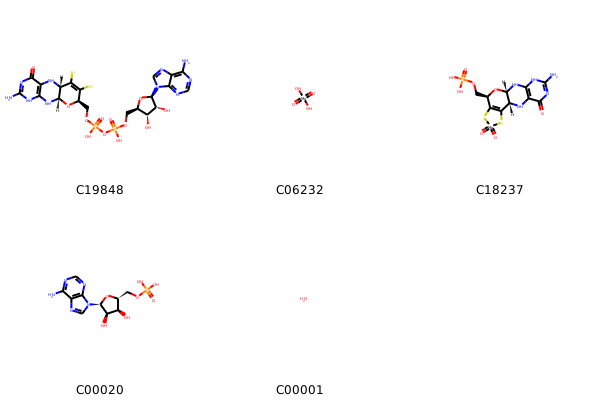

In [9]:
smiles_list = []
n_list = []
for m in rs.components:
    print(m.name, m.mid_diam, m.logP, m.role, m.Synth_score, m.complexity, m.pkl)
    print(m.name, m.DB)
    print('---', Descriptors.ExactMolWt(Chem.MolFromSmiles(m.SMILES)))
    n_list.append(m.name)
    smiles_list.append(m.SMILES)
    MOL = Chem.MolFromSmiles(m.SMILES)
#     Draw.MolToFile(MOL, fileName=m.name+'.svg')
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

## Analyse all RS for a certain skip_reaction reason

In [75]:
import os

In [76]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [82]:
count = 0
count_total = 0
max_logP = 0
min_logS = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=directory):
    count_total += 1
    try:
        if rs.reversible is True:
            count += 1
        max_logP = max([max_logP, rs.max_logP])
        min_logS = min([min_logS, rs.min_logS])
    except AttributeError:
        pass
#     if rs.skip_rxn is True:
#         if rs.skip_reason == 'one component has no SMILES':
#             count += 1
#             print(rs.pkl)
#             os.system('rm '+rs_dir+rs.pkl)

In [84]:
max_logP, min_logS

(11.941399999999982, -11.69390846242745)

In [79]:
print(count, count_total, count/count_total * 100)

0 12182 0.0


## Analyse the number of times each skip_reason is used

In [23]:
from ercollect import rxn_syst
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

In [14]:
reasons = {'one component failed resolution': 0, 'SABIO E-ID is for mutant': 0, 
           'SABIO R-ID not found': 0,  'DNA present - SABIO has a bug': 0,
           'CHEBI ID of a component not available': 0, 'a component is in skip_names': 0,
           'one component is ?': 0, 'No result for KEGG URL search - likely outdated': 0,
           'CHEBI ID not available for one component': 0,
           'one component has invalid SMILES': 0, 'one component has no SMILES': 0, 
           'one component has wildcard SMILES': 0,
           'one component has no molecule - rxn is incomplete or generic': 0,
           'one component could not have diameter calculated': 0,
           'KEGG ID could not be converted to MOL': 0,
           'KEGG ID gave generic structure': 0,
           'KEGG rxn includes polymeric species': 0}

In [15]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'new_reactions_atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [16]:
count_total = 0
count_skipped = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=directory):
#     if 'KEGG' not in rs.pkl:
#         continue
    count_total += 1
    if rs.skip_rxn is True:
        count_skipped += 1
        reasons[rs.skip_reason] += 1
#         if rs.skip_reason == 'CHEBI ID not available for one component':
#             print(rs.__dict__)
#             input()

In [17]:
print(count_skipped, count_total, count_skipped/count_total * 100)

7971 12182 65.43260548350025


In [18]:
reasons

{'CHEBI ID not available for one component': 0,
 'CHEBI ID of a component not available': 0,
 'DNA present - SABIO has a bug': 0,
 'KEGG ID could not be converted to MOL': 2897,
 'KEGG ID gave generic structure': 138,
 'KEGG rxn includes polymeric species': 44,
 'No result for KEGG URL search - likely outdated': 2,
 'SABIO E-ID is for mutant': 0,
 'SABIO R-ID not found': 0,
 'a component is in skip_names': 0,
 'one component could not have diameter calculated': 4494,
 'one component failed resolution': 0,
 'one component has invalid SMILES': 0,
 'one component has no SMILES': 0,
 'one component has no molecule - rxn is incomplete or generic': 0,
 'one component has wildcard SMILES': 396,
 'one component is ?': 0}

In [25]:
MWs =[]
for rs in rxn_syst.yield_rxn_syst(output_dir=directory):
    rs_MW = []
    if rs.skip_rxn is True:
        if rs.skip_reason == 'one component could not have diameter calculated':
            if rs.components is not None:
                for m in rs.components:
                    MW = Descriptors.MolWt(m.mol)
                    rs_MW.append(MW)
                    MWs.append(MW)
                if max(rs_MW) < 500:
                    print(rs.pkl)

sRS-1_13_11_XX-KEGG-R09163.gpkl
sRS-1_13_11_XX-KEGG-R09206.gpkl
sRS-1_14_11_12-KEGG-R07184.gpkl
sRS-1_6_XX_XX-KEGG-R09218.gpkl
sRS-4_1_1_XX-KEGG-R09164.gpkl
sRS-4_1_1_XX-KEGG-R09207.gpkl
sRS-4_1_1_XX-KEGG-R09208.gpkl
sRS-4_2_3_127-KEGG-R10006.gpkl
sRS-4_2_3_42-KEGG-R06313.gpkl
sRS-4_2_3_80-KEGG-R10726.gpkl
sRS-XX_XX_XX_XX-KEGG-R06314.gpkl
sRS-XX_XX_XX_XX-KEGG-R06316.gpkl
sRS-XX_XX_XX_XX-KEGG-R06317.gpkl
sRS-XX_XX_XX_XX-KEGG-R08420.gpkl


## Analyse a list of RS
- example given here of RS with max_comp_size < some threshold
- using threshold 4.2 angstrom 10/12/18

In [26]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw

In [27]:
RS_des = ['sRS-1_11_1_21-KEGG-R00009.gpkl', 'sRS-1_11_1_21-KEGG-R00602.gpkl',
          'sRS-1_11_1_8-KEGG-R02810.gpkl', 'sRS-1_13_11_49-KEGG-R05721.gpkl',
          'sRS-1_15_1_1-KEGG-R00275.gpkl', 'sRS-1_16_3_1-KEGG-R00078.gpkl',
          'sRS-1_1_3_13-KEGG-R00608.gpkl', 'sRS-1_2_2_4-KEGG-R00276.gpkl',
          'sRS-1_2_98_1-KEGG-R00614.gpkl', 'sRS-1_4_3_21-KEGG-R06154.gpkl',
          'sRS-1_7_1_14-KEGG-R09809.gpkl', 'sRS-1_7_3_6-KEGG-R10230.gpkl',
          'sRS-1_8_3_4-KEGG-R01851.gpkl', 'sRS-3_13_1_5-KEGG-R10534.gpkl',
          'sRS-3_13_1_5-KEGG-R10535.gpkl', 'sRS-3_13_1_5-KEGG-R10538.gpkl',
          'sRS-3_5_1_49-KEGG-R00524.gpkl', 'sRS-3_5_5_8-KEGG-R05780.gpkl',
          'sRS-3_5_5_XX-KEGG-R00152.gpkl', 'sRS-4_2_1_112-KEGG-R05380.gpkl',
          'sRS-4_2_1_66-KEGG-R01408.gpkl', 'sRS-4_99_1_2-KEGG-R09339.gpkl',
          'sRS-XX_XX_XX_XX-KEGG-R00793.gpkl', 'sRS-XX_XX_XX_XX-KEGG-R09094.gpkl',
          'sRS-XX_XX_XX_XX-KEGG-R09996.gpkl']

In [30]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [37]:
count = 0
for pkl in RS_des:
    print(pkl)
    rs = get_RS(directory+pkl, output_dir=directory, verbose=False)
    smiles_list = []
    n_list = []
    for m in rs.components:
        if m.mid_diam == 0:
            print(m.name, m.mid_diam, m.SMILES)
            print(m.pkl)
    print('---------------------------------------------')
    count += 1
print(count)

sRS-1_13_11_XX-KEGG-R09163.gpkl
C18252 0 O=C(O)c1cccc2ccc3cccc(C(=O)O)c3c12
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4518.gpkl
---------------------------------------------
sRS-1_13_11_XX-KEGG-R09206.gpkl
C18277 0 O=C(O)c1cccc2ccc3c4ccccc4cc(C(=O)O)c3c12
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4520.gpkl
---------------------------------------------
sRS-1_14_11_12-KEGG-R07184.gpkl
C12308 0 C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12CCC[C@](C)(C(=O)OC1)[C@H]2[C@@H]3C(=O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6409.gpkl
---------------------------------------------
sRS-1_6_XX_XX-KEGG-R09218.gpkl
C18252 0 O=C(O)c1cccc2ccc3cccc(C(=O)O)c3c12
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4518.gpkl
---------------------------------------------
sRS-4_1_1_XX-KEGG-R09164.gpkl
C18252 0 O=C(O)c1cccc2ccc3cccc(C(=O)O)c3c12
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4518.gpkl
---------------------------------------------
sRS-4_1_1_XX-KEGG-R09207.gpkl
C18277 0 O=C(O)c1cccc2ccc3c4ccccc4cc(C(=O)O)c3

In [36]:
m.mol

##  Modify some attribute of all RS

In [37]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'kegg_111218/'
# directory += 'atlas_111218/'
# directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [38]:
rs.__dict__

{'DB': 'KEGG',
 'DB_ID': 'R09996',
 'EC': '-.-.-.-',
 'UniprotID': None,
 'all_fit': True,
 'components': [<ercollect.molecule.molecule at 0x7fd4c2a82550>,
 'delta_comp': 6.0,
 'delta_sa': 0.16509230769230676,
 'max_XlogP': 0.2,
 'max_comp_size': 3.107,
 'max_logP': 0.067,
 'min_XlogP': -1.1,
 'min_logP': -0.44710000000000005,
 'mol_collected': True,
 'p_max_comp': 8.0,
 'p_max_sa': 4.107167918949392,
 'pkl': 'sRS-XX_XX_XX_XX-KEGG-R09996.gpkl',
 'r_max_comp': 2.0,
 'r_max_sa': 3.942075611257085,
 'req_mod': None,
 'seed_MOF': None,
 'skip_reason': None,
 'skip_rxn': False}

In [39]:
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    rs.mol_collected = False
    rs.max_logP = None
    rs.max_XlogP = None
    rs.max_logS = None
    rs.min_logP = None
    rs.min_XlogP = None
    rs.min_logS = None
    rs.save_object(rs_dir+rs.pkl)